In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/Users/chiara/Ironhack/week4/first_project/data/clean/CleanStars.csv')
print(df.head())

                                               name  year       city  \
0                                       ho hung kee  2019  Hong Kong   
1                                       feng wei ju  2019      Macau   
2  imperial treasure fine teochew cuisine (orchard)  2018  Singapore   
3                                     shisen hanten  2018  Singapore   
4                                        ma cuisine  2018  Singapore   

      region  cuisine price  \
0  Hong Kong  chinese     $   
1      Macau  chinese     $   
2  Singapore  chinese     $   
3  Singapore  chinese     $   
4  Singapore   french     $   

                                                 url    stars major_city  
0  https://guide.michelin.com/hk/en/hong-kong-reg...   1 star  Hong Kong  
1  https://guide.michelin.com/mo/en/macau-region/...  2 stars      Macau  
2  https://guide.michelin.com/sg/en/singapore-reg...   1 star  Singapore  
3  https://guide.michelin.com/sg/en/singapore-reg...  2 stars  Singapore  
4  ht

In [38]:
df.columns

Index(['name', 'year', 'city', 'region', 'cuisine', 'price', 'url', 'stars',
       'major_city'],
      dtype='object')

/var/folders/st/1pfcl_tj40x4zfj7bthg6pdw0000gn/T/ipykernel_99774/369054855.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= top_10_cities, x='city', y='restaurant_count', palette='viridis')


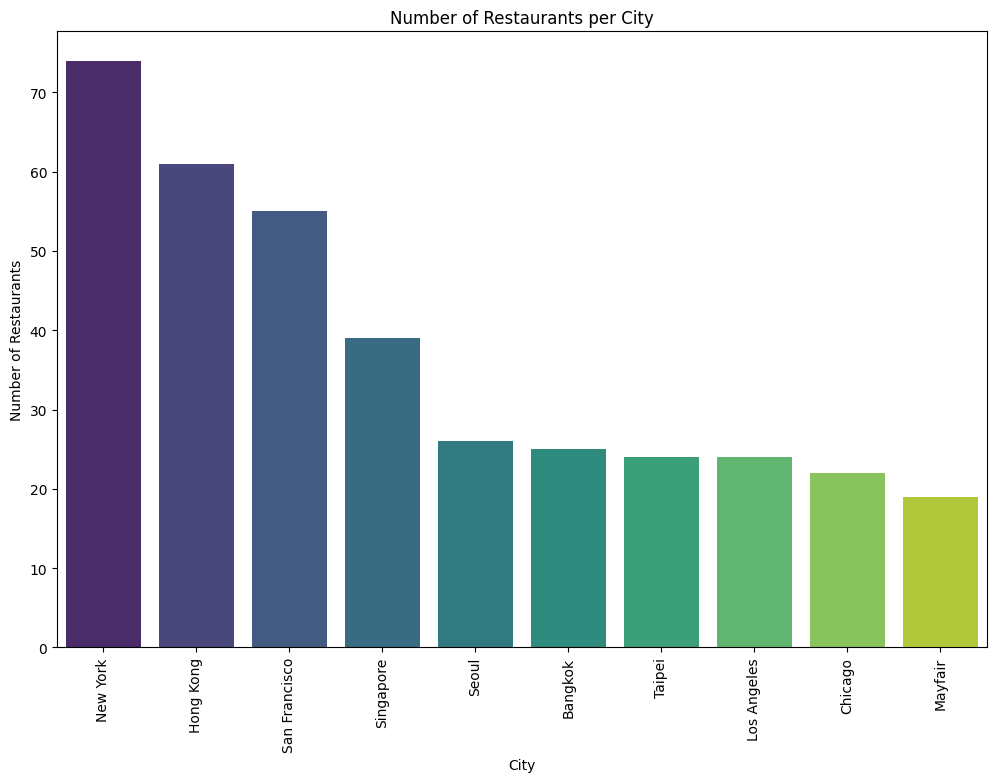

In [2]:
# Count of restaurants per city Graph

city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'restaurant_count']

top_10_cities = city_counts.head(10)

# Using Seaborn for a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data= top_10_cities, x='city', y='restaurant_count', palette='viridis')
plt.xticks(rotation=90)  # Rotate city names for readability
plt.title('Number of Restaurants per City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

In [3]:



# Step 1: Group by region, city, and stars, and aggregate

grouped_data = df.groupby(['city', 'stars']).size().reset_index(name='restaurant_count')

# Step 2: Aggregate to get total restaurant counts per city
total_city_counts = grouped_data.groupby(['city'])['restaurant_count'].sum().reset_index()

# Step 3: Sort by restaurant counts and take the top 10
top_10_cities = total_city_counts.nlargest(10, 'restaurant_count')['city']

# Step 4: Filter the original grouped data to include only these top 10 cities
filtered_grouped_data = grouped_data[grouped_data['city'].isin(top_10_cities)]

# Step 5: Sort `filtered_grouped_data` by total restaurant count for each city
filtered_grouped_data['total_restaurants'] = filtered_grouped_data.groupby('city')['restaurant_count'].transform('sum')
filtered_grouped_data = filtered_grouped_data.sort_values(by='total_restaurants', ascending=False)

/var/folders/st/1pfcl_tj40x4zfj7bthg6pdw0000gn/T/ipykernel_99774/3331831065.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_grouped_data['total_restaurants'] = filtered_grouped_data.groupby('city')['restaurant_count'].transform('sum')


/var/folders/st/1pfcl_tj40x4zfj7bthg6pdw0000gn/T/ipykernel_99774/2414122452.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_grouped_data, x='city', y='restaurant_count', hue='stars', ci=None, palette='bright')


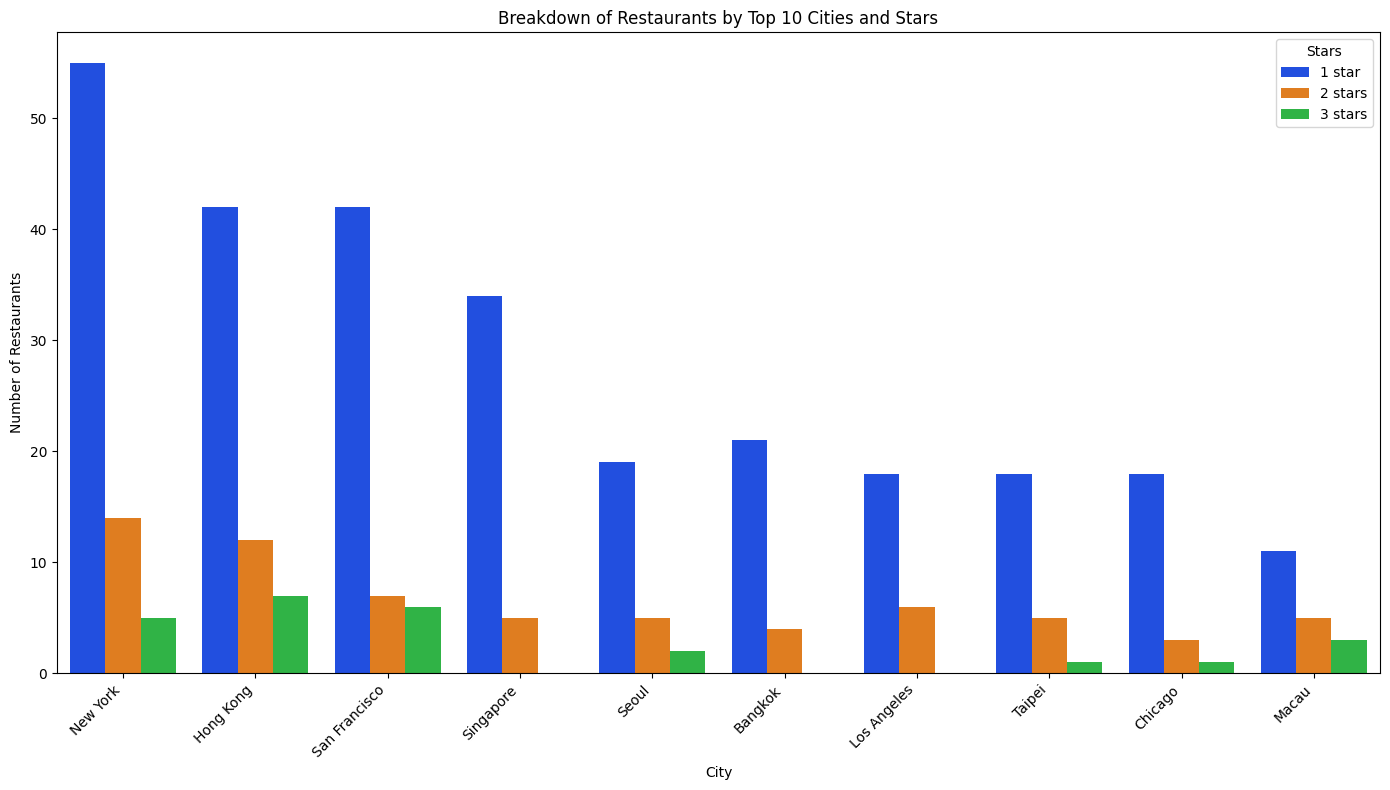

In [4]:

plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_grouped_data, x='city', y='restaurant_count', hue='stars', ci=None, palette='bright')

plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.title('Breakdown of Restaurants by Top 10 Cities and Stars')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.legend(title='Stars')  # Legend with the title 'Stars'
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

In [19]:
#most popular cuisine per Region



# Group by region and cuisine, then count unique restaurant names
region_cuisine_counts = df.groupby(['region', 'cuisine'])['name'].nunique().reset_index(name='restaurant_count')

# Aggregate to get total restaurant counts per region
total_region_counts = region_cuisine_counts.groupby('region')['restaurant_count'].sum().reset_index()

# Sort by restaurant counts and get the top 5 regions
top_5_regions = total_region_counts.nlargest(5, 'restaurant_count')['region']

# Filter the original data to include only the top 5 regions
filtered_region_data = region_cuisine_counts[region_cuisine_counts['region'].isin(top_5_regions)]

# Ensure the filtered data is sorted by total restaurant counts in descending order
filtered_region_data['total_restaurants'] = filtered_region_data.groupby('region')['restaurant_count'].transform('sum')
filtered_region_data = filtered_region_data.sort_values(by='total_restaurants', ascending=False)



/var/folders/st/1pfcl_tj40x4zfj7bthg6pdw0000gn/T/ipykernel_99774/835109087.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_region_data['total_restaurants'] = filtered_region_data.groupby('region')['restaurant_count'].transform('sum')


/var/folders/st/1pfcl_tj40x4zfj7bthg6pdw0000gn/T/ipykernel_99774/2405595645.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=filtered_region_data, x='region', y='restaurant_count', hue='cuisine', ci=None, palette='muted', order=filtered_region_data['region'].unique())


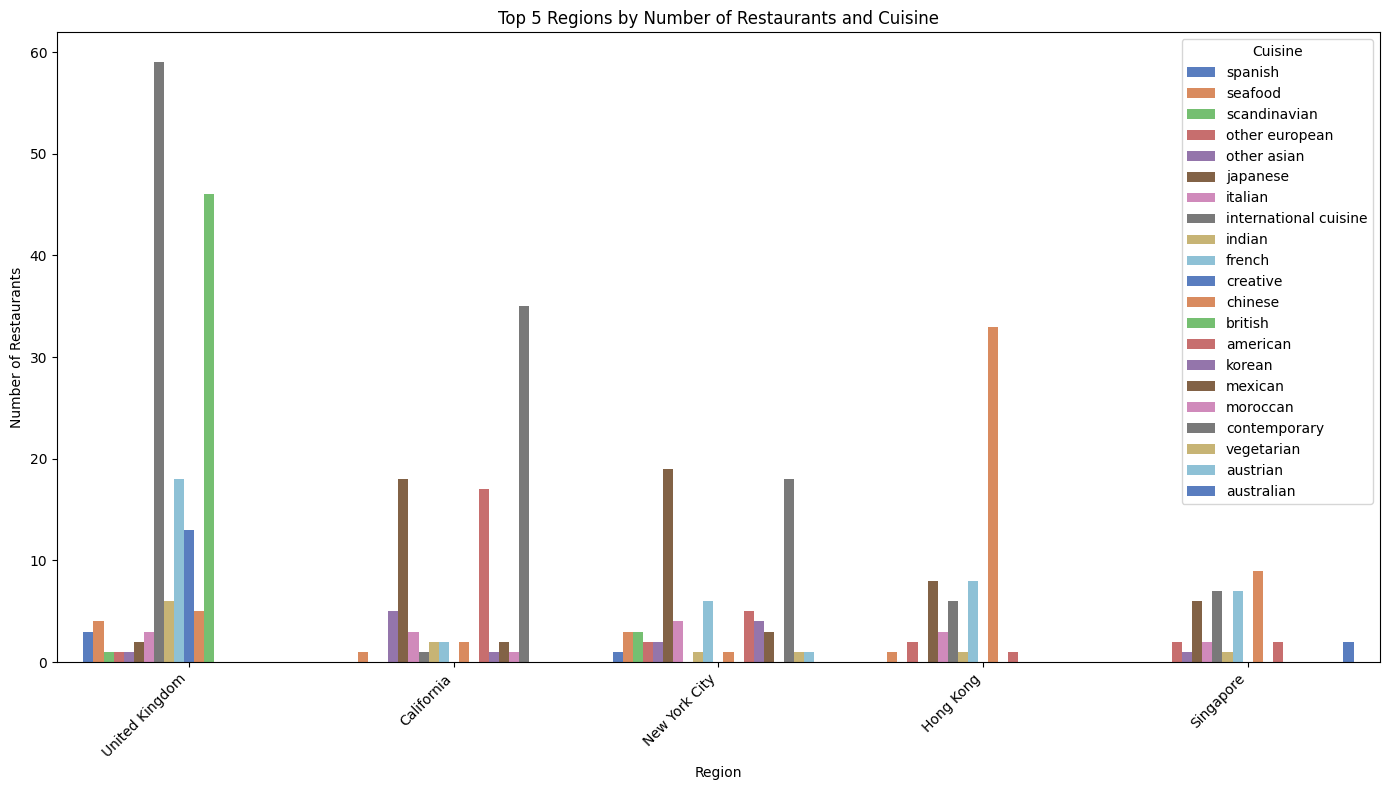

In [20]:
# Plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=filtered_region_data, x='region', y='restaurant_count', hue='cuisine', ci=None, palette='muted', order=filtered_region_data['region'].unique())

plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.title('Top 5 Regions by Number of Restaurants and Cuisine')
plt.xlabel('Region')
plt.ylabel('Number of Restaurants')
plt.legend(title='Cuisine')  # Legend with the title 'Cuisine'
plt.tight_layout()  # Adjust layout to ensure elements fit well
plt.show()

In [28]:
#which cuisine have the highest recognition of 3 stars?

three_star_df = df[df['stars'] == '3 stars']

# Count the number of 3-star restaurants for each cuisine
cuisine_counts = three_star_df['cuisine'].value_counts()


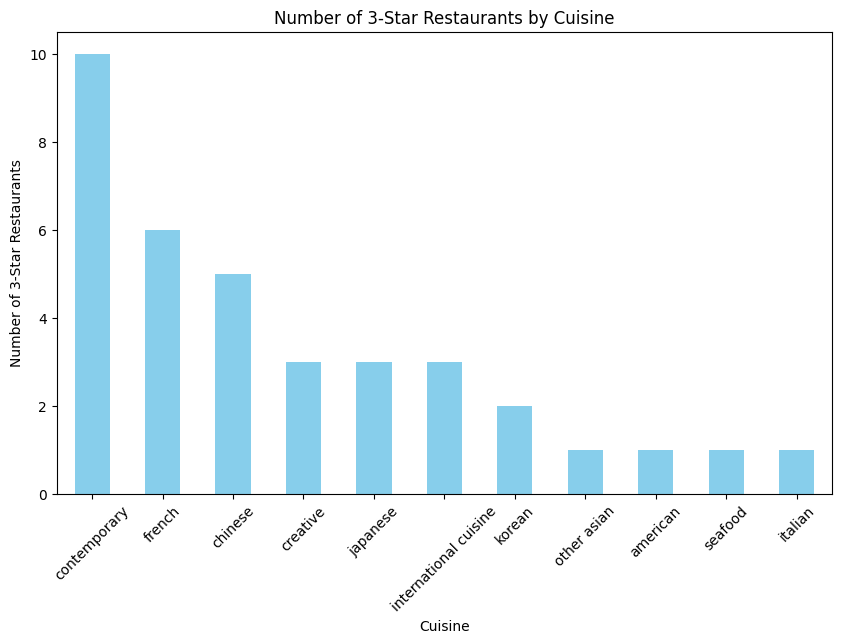

In [29]:
# Plotting the cuisines count
plt.figure(figsize=(10, 6))
cuisine_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Cuisine')
plt.ylabel('Number of 3-Star Restaurants')
plt.title('Number of 3-Star Restaurants by Cuisine')
plt.xticks(rotation=45)
plt.show()

In [30]:
# most expensive restaurant in contemporary cuisine in new york and hong k


# Filter restaurants with 3 stars, contemporary cuisine, and located in New York
filtered_df = df[(df['stars'] == '3 stars') & 
                 (df['cuisine'] == 'contemporary') & 
                 (df['city'] == 'New York')]

# Display the result
filtered_df



,name,year,city,region,cuisine,price,url,stars,major_city
453,eleven madison park,2019,New York,New York City,contemporary,$$$$,https://guide.michelin.com/us/en/new-york-stat...,3 stars,New York
455,per se,2019,New York,New York City,contemporary,$$$$,https://guide.michelin.com/us/en/new-york-stat...,3 stars,New York
467,chef's table at brooklyn fare,2019,New York,New York City,contemporary,$$$$,https://guide.michelin.com/us/en/new-york-stat...,3 stars,New York


In [37]:
# Filter restaurants with 3 stars, contemporary cuisine, and located in Hong Kong
filtered_df2 = df[(df['stars'] == '3 stars') & 
                  (df['cuisine'].str.contains('contemporary', case=False, na=False)) & 
                  (df['city'] == 'Hong Kong')]

# Display the result
filtered_df2

,name,year,city,region,cuisine,price,url,stars,major_city
